> **Student Name:** Mylla Pereira de Castro
>
> **Student Number:** T00244395




# **Stage 1**
***Describe Data***

The dataset used as part of this assignment contains global surface temperature changes collected monthly from 1961 to 2022 and currently available in FAOSTAT website. FAO (Food and Agriculture Organization) is an United Nation's agency and collects and distributes data with the goal of defeating global hunger.

The temperature change on land statistics data is updated annually with data sourced from GISTEMP data, the Global Surface Temperature Change data distributed by National Aeronaitics and Space Administration Goddard Institue for Space Studies (NASA-GISS). The temperature change is calculated in respect to a baseline climatology corresponding to the period of 1951 to 1980.

This dataset contains the following columns:

>**Domain Code:** The numerical code of the domain column (integer)
>
>**Domain:** Category of the collected data (object)
>
>**Area Code:** The numerical code of the area column (integer)
>
>**Area:** Countries and territorries (object)
>
>**Months Code:** The numerical code of months column (integer)
>
>**Months:** Months (object)
>
>**Years Code:** The numerical code of years column (integer)
>
>**Years:** Years, Metereological year (object)
>
>**Element Code:** The numerical code of element column (integer)
>
>**Element:** "Temperature change" or "Standard Deviation" (object)
>
>**Unit:** Celsius degree °C (object)
>
>**Value** Columns with numerical representation of Element from 1961 to 2022


Let's exam the data a bit closer!

In [2]:
# Importing libraries (make sure these libraries are installed in the runtime)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [3]:
# Importing the data
temp_change_path = "./FAOSTAT_data_2023.csv"
co2_emissions_path = "./FAOSTAT_data_emissions_2023.csv"
temp_change_df = pd.read_csv(temp_change_path)
emissions_df = pd.read_csv(co2_emissions_path)


# Dataframe shape
print(f'Land temperature change shape: {temp_change_df.shape}')
print(f'CO2 emissions dataframe shape: {emissions_df.shape}')

Land temperature change shape: (238051, 14)
CO2 emissions dataframe shape: (95559, 17)


In [4]:
# Dataframe description
print(f'Land temperature change description: \n {temp_change_df.describe()}')
print(f'CO2 emissions dataframe  description: \n {emissions_df.describe()}')

# Updating columns names before merging it
temp_change_df = temp_change_df.rename(columns={'Unit': 'Temp Unit', 'Value': 'Temp Value'})
emissions_df = emissions_df.rename(columns={'Unit': 'Emissions Unit', 'Value': 'Emissions Value', 'Source': 'Emissions Source'})

Land temperature change description: 
        Area Code (M49)  Element Code    Months Code      Year Code  \
count    238051.000000      238051.0  238051.000000  238051.000000   
mean        434.274655        7271.0    7009.882353    1992.336928   
std         254.701748           0.0       6.037955      17.895595   
min           4.000000        7271.0    7001.000000    1961.000000   
25%         212.000000        7271.0    7005.000000    1977.000000   
50%         430.000000        7271.0    7009.000000    1993.000000   
75%         654.000000        7271.0    7016.000000    2008.000000   
max         894.000000        7271.0    7020.000000    2022.000000   

                Year          Value  
count  238051.000000  229855.000000  
mean     1992.336928       0.525593  
std        17.895595       1.043814  
min      1961.000000      -9.191000  
25%      1977.000000      -0.051000  
50%      1993.000000       0.453000  
75%      2008.000000       1.039000  
max      2022.000000      

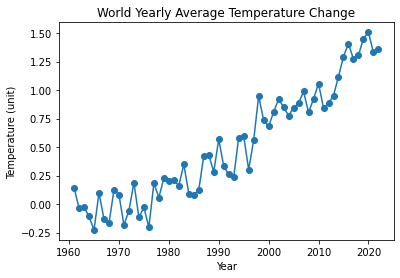

In [5]:
# Plotting the data to visualise the temperature change in land over the years in the world

# Group the data by year and calculate the mean temperature for each year
df_yearly = temp_change_df.groupby(['Year'])['Temp Value'].mean().reset_index()

# Plot temperature data as a line plot
plt.plot(df_yearly['Year'], df_yearly['Temp Value'], marker='o')

# Set the plot title and axis labels
plt.title('World Yearly Average Temperature Change')
plt.xlabel('Year')
plt.ylabel('Temperature (unit)')

# Display the plot
plt.show()

In [6]:

# Removing irrelevant columns
temp_change_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Months Code', 'Year Code', 'Flag', 'Flag Description', 'Element'], axis=1, inplace=True)
emissions_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Item Code', 'Element Code', 'Year Code', 'Flag', 'Flag Description', 'Element', 'Source Code', 'Note'], axis=1, inplace=True)

print(temp_change_df.columns)
print(emissions_df.columns)

Index(['Area', 'Months', 'Year', 'Temp Unit', 'Temp Value'], dtype='object')
Index(['Area', 'Item', 'Year', 'Emissions Source', 'Emissions Unit',
       'Emissions Value'],
      dtype='object')


In [7]:
# Merging CO2 emissions and temperature changes on land dataframe

merged_df = pd.merge(temp_change_df, emissions_df, on=['Year', 'Area'], how='inner')

merged_df.shape


(1605089, 9)

In [8]:
# Let's get the numeric average of temperature increase in the world
print(f'Average of temperature change on land over the years {df_yearly["Temp Value"].mean()}')

# Get countries with the highest and lowest temperature change mean since 1961
temp_amp_all = temp_change_df.groupby(['Area'])['Temp Value'].mean().sort_values(ascending=False)
print(f'Countries with highest and lowest average of temperature change on land over the years {temp_amp_all}')


Average of temperature change on land over the years 0.509437575703311
Countries with highest and lowest average of temperature change on land over the years Area
Luxembourg                         1.584657
Serbia                             1.552727
Estonia                            1.549899
Belgium                            1.525731
Russian Federation                 1.514425
                                     ...   
Pacific Islands Trust Territory    0.054901
Falkland Islands (Malvinas)        0.021628
Yugoslav SFR                       0.019567
Nauru                             -0.024839
Pitcairn                          -0.098580
Name: Temp Value, Length: 247, dtype: float64


In [9]:
# Get countries with the highest and lowest temperature change mean since 2013

temp_s_2013 = temp_change_df[temp_change_df['Year'] >= 2013].groupby(['Area'])['Temp Value'].mean().sort_values(ascending=False)
print(f'Countries with highest and lowest average of temperature change on land over the years {temp_s_2013}')

Countries with highest and lowest average of temperature change on land over the years Area
Svalbard and Jan Mayen Islands    3.306371
Estonia                           2.198871
Belarus                           2.180859
Russian Federation                2.178324
Finland                           2.148653
                                    ...   
Nauru                                  NaN
Niue                                   NaN
Pitcairn                               NaN
Tokelau                                NaN
Yemen                                  NaN
Name: Temp Value, Length: 239, dtype: float64


Remembering that the data above is simpling the average of temperature change on land in relation to a baseline. The highest temperature change collected by FAO was in "Svalbard and Jan Mayen Islands" in 2014. These territorries are part of a Norwegian archipelago in the Artic and in [2022 the Norwegian Polar Institute](https://www.bbc.com/news/world-europe-63387233) calculated that Longyearbyen (located in Svalbard archipelago) is heating six times faster than the global average.

Also, it's worth mentioning that the countries with highest and lowest temperature changes on land vary significantly as per above. If we were to dive deeper on this analysis, we could spot some interesting findings in relation to countries that have lower/higher temperature changes in the last years and what initiatives, natural or political events might have affected that. 

/var/folders/w3/5k38nc1d35zbfg1ff2_nj_rh0000gn/T/ipykernel_25195/3161802997.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True)


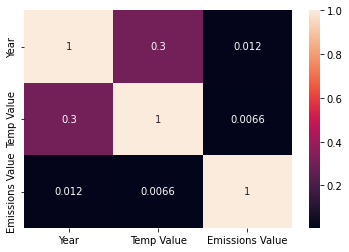

In [10]:
# Correlating data features
sns.heatmap(merged_df.corr(), annot=True)
plt.show()

# **Stage 2**

There is a number of renowed institutions that work on collecting, analysing and even projecting temperature changes over the next decades using climate models.

Climate change is an extremely important subject that I believe will be news spotlight for a long time around global levels initiatives to tackle latent problems and warn the general population of the impacts this generation is already facing.

[The Paris Agreement](https://unfccc.int/process-and-meetings/the-paris-agreement) on climate change is an attempt to hold “the increase in the global average temperature to well below 2°C above pre-industrial levels” and pursue efforts “to limit the temperature increase to 1.5°C above pre-industrial levels” globally.

By analysing the Food and Agriculture Organization of the United Nations (FAO) data on temperature changes on land, my goal is to build a model with that can be used to predict temperatures over the next years.

# **Stage 3**

Cleaning the data, linking datasets etc.. 



In [11]:
# Removing duplicates
merged_df.drop_duplicates()

# Number of nulls in each column
merged_df.isnull().sum()

Area                    0
Months                  0
Year                    0
Temp Unit               0
Temp Value          54114
Item                    0
Emissions Source        0
Emissions Unit          0
Emissions Value       527
dtype: int64

In [12]:
# Let's see if all rows "Temp Unit" are in Celsius
print((merged_df['Temp Unit'] == '°C').sum() == merged_df.shape[0])

# And all "Emissions Unit" are in kilotonnes
print((merged_df['Emissions Unit'] == 'kilotonnes').sum() == merged_df.shape[0])


True
True


In [13]:
print(f'Average of temperature change over the years {df_yearly["Temp Value"].mean()}')

# Now, since there are 8196 rows without a "Value" column is less than 5% of the data, I will drop these and see if there's any significant change in the world's temperature change average
merged_df = merged_df.dropna()

print(f'Average of temperature change over the years {df_yearly["Temp Value"].mean()}')

# The overall mean hasn't changed, we should be good to proceed

Average of temperature change over the years 0.509437575703311
Average of temperature change over the years 0.509437575703311


In [14]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

temp_copy = merged_df.copy()


label_encoder = LabelEncoder()
temp_copy['Area Encoded'] = label_encoder.fit_transform(temp_copy['Area'])
temp_copy['Month Encoded'] = label_encoder.fit_transform(temp_copy['Months'])
temp_copy['Item Encoded'] = label_encoder.fit_transform(temp_copy['Item'])
temp_copy['Emission Source Encoded'] = label_encoder.fit_transform(temp_copy['Emissions Source'])
temp_copy

,Area,Months,Year,Temp Unit,Temp Value,Item,Emissions Source,Emissions Unit,Emissions Value,Area Encoded,Month Encoded,Item Encoded,Emission Source Encoded
0,Afghanistan,January,1990,°C,0.530,Drained organic soils (CO2),FAO TIER 1,kilotonnes,0.0000,0,5,0,0
1,Afghanistan,January,1990,°C,0.530,On-farm energy use,FAO TIER 1,kilotonnes,274.7953,0,5,14,0
2,Afghanistan,January,1990,°C,0.530,Forestland,FAO TIER 1,kilotonnes,-2388.8030,0,5,10,0
3,Afghanistan,January,1990,°C,0.530,Net Forest conversion,FAO TIER 1,kilotonnes,0.0000,0,5,12,0
4,Afghanistan,January,1990,°C,0.530,Fires in organic soils,FAO TIER 1,kilotonnes,0.0000,0,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605084,Zimbabwe,Meteorological year,2020,°C,0.389,Food Retail,FAO TIER 1,kilotonnes,102.5657,236,12,7,0
1605085,Zimbabwe,Meteorological year,2020,°C,0.389,Food Household Consumption,FAO TIER 1,kilotonnes,320.6979,236,12,4,0
1605086,Zimbabwe,Meteorological year,2020,°C,0.389,Food Transport,FAO TIER 1,kilotonnes,211.5333,236,12,8,0
1605087,Zimbabwe,Meteorological year,2020,°C,0.389,Energy,FAO TIER 1,kilotonnes,9210.0000,236,12,1,0


# **Stage 4**
Choose and train Estimator.

In order to choose an estimator, I will be following the documentation and criteria found in the suggested [Scikit analysis](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

By analysing the temperature changes dataset, we know that:
- It has more than 50 samples
- No category needs to be predicted but a quantity
- There are more than 100k samples (> 238k)
- And only few features are important

For that reason, I should be using a Lasso regression model.


The target for this 

In [15]:
# Defining target and features

# Target
Y = temp_copy['Temp Value']

# Features
X = temp_copy[['Area Encoded', 'Year', 'Month Encoded', 'Emissions Value', 'Emission Source Encoded', 'Item Encoded']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Checking the trained and tested data consistancy
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(465135, 6)
(1085313, 6)
(465135,)
(1085313,)


In [16]:
# Linear Regression:


# Scale the features using the StandardScaler
scaler = StandardScaler()
X_linear_train = scaler.fit_transform(x_train)
X_linear_test = scaler.transform(x_test)

# Train a linear regression model on the training set
linear_model = LinearRegression()
linear_model.fit(X_linear_train, y_train)

# Evaluate the model on the testing set
score = linear_model.score(X_linear_test, y_test)
print('R-squared score:', score)



In [ ]:
# Lasso Regression


# Build a Lasso linear regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(x_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
score = lasso_model.score(x_test, y_test)
print('R-squared score:', score)
print("Mean Squared Error:", mse)

R-squared score: 0.08966372723646432
Mean Squared Error: 1.00370867045504


In [ ]:
# ElasticNet Regression

# Instantiate an ElasticNet object with alpha=0.1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the ElasticNet object to the training data
elastic_net.fit(x_train, y_train)

# Make predictions on the test data
y_pred = elastic_net.predict(x_test)

score = elastic_net.score(x_test, y_test)
print('R-squared score:', score)

R-squared score: 0.09010261182968915


In [ ]:
# Create a Ridge regression model with alpha=1
ridge_model = Ridge(alpha=1)

# Train the model on the training data
ridge_model.fit(x_train, y_train)

# Use the model to make predictions on the testing data
y_pred = ridge_model.predict(x_test)

# Evaluate the model using mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("R-squared score: {:.2f}".format(r2))

R-squared score: 0.09


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.08997e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# **Stage 5**
Evaluate your model and revisit 4...repeat..

For all the regression models tested above, the R-squared score hasn't reached 20%.

Let's see how it looks visually if compared to the original data:

In [ ]:
def plot_data(original_df, predicted_df):
    # Add a new column 
    original_df['Predicted temp'] = predicted_df

    df_yearly = original_df.groupby(['Year'])['Temp Value', 'Predicted temp'].mean().reset_index()

    # Plot temperature data as a line plot
    plt.plot(df_yearly['Year'], df_yearly['Temp Value'], marker='o')
    plt.plot(df_yearly['Year'], df_yearly['Predicted temp'], marker='o')

    plt.show()

/var/folders/w3/5k38nc1d35zbfg1ff2_nj_rh0000gn/T/ipykernel_95603/2950389159.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_yearly = original_df.groupby(['Year'])['Temp Value', 'Predicted temp'].mean().reset_index()


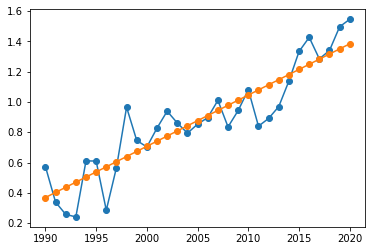

In [ ]:
# Lasso Model prediction

lasso_pred = lasso_model.predict(X)

plot_data(temp_copy, lasso_pred)

/var/folders/w3/5k38nc1d35zbfg1ff2_nj_rh0000gn/T/ipykernel_95603/2950389159.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_yearly = original_df.groupby(['Year'])['Temp Value', 'Predicted temp'].mean().reset_index()


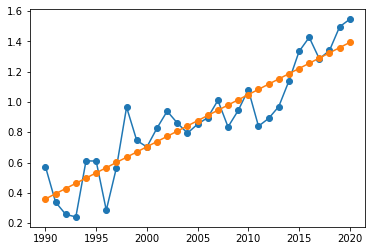

In [ ]:
# # ElasticNet Regression Model prediction

elastic_pred = elastic_net.predict(X)

plot_data(temp_copy, elastic_pred)

In [ ]:
# Linear Regression Model Prediction

linear_pred = linear_model.predict(X)

plot_data(temp_copy, linear_pred)

NameError: name 'linear_model' is not defined

/var/folders/w3/5k38nc1d35zbfg1ff2_nj_rh0000gn/T/ipykernel_95603/2950389159.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_yearly = original_df.groupby(['Year'])['Temp Value', 'Predicted temp'].mean().reset_index()


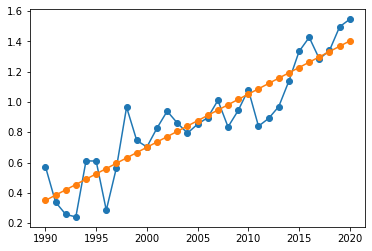

In [ ]:
# Ridge regression model prediction

ridge_pred = ridge_model.predict(X)

plot_data(temp_copy, ridge_pred)

# **Stage 6**



